In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df = pd.read_csv('/home/vimalkumar/Downloads/samples/breast-cancer.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [35]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [8]:
df['quality'].value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

In [9]:
df['quality'] = df['quality'].replace(4,7)
df['quality'] = df['quality'].replace(8,7)
df['quality'] = df['quality'].replace(3,7)

In [10]:
df['quality'].value_counts()

5    483
6    462
7    198
Name: quality, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

In [13]:
x_ind = df.drop(['quality','Id'],axis=1)
x_ind

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2


In [14]:
y_dep = df['quality']

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x_ind,y_dep,test_size = 0.2,random_state=5)

In [50]:
from sklearn.tree import DecisionTreeClassifier


In [51]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [52]:
pred=clf.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9333333333333333

[Text(334.8, 504.7714285714286, 'X[3] <= 0.8\ngini = 0.666\nsamples = 120\nvalue = [42, 39, 39]'),
 Text(167.4, 427.11428571428576, 'gini = 0.0\nsamples = 42\nvalue = [42, 0, 0]'),
 Text(502.20000000000005, 427.11428571428576, 'X[3] <= 1.75\ngini = 0.5\nsamples = 78\nvalue = [0, 39, 39]'),
 Text(334.8, 349.4571428571429, 'X[0] <= 4.95\ngini = 0.133\nsamples = 42\nvalue = [0, 39, 3]'),
 Text(167.4, 271.8, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(502.20000000000005, 271.8, 'X[2] <= 5.45\ngini = 0.093\nsamples = 41\nvalue = [0, 39, 2]'),
 Text(334.8, 194.14285714285717, 'X[2] <= 4.95\ngini = 0.049\nsamples = 40\nvalue = [0, 39, 1]'),
 Text(167.4, 116.48571428571432, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(502.20000000000005, 116.48571428571432, 'X[3] <= 1.55\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(334.8, 38.82857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(669.6, 38.82857142857142, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),


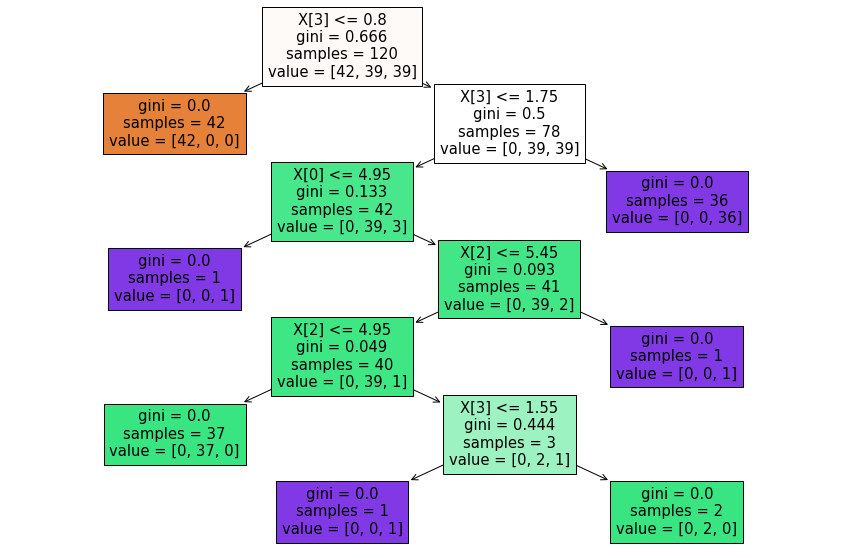

In [53]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)

In [71]:
clf.tree_.node_count

13

In [54]:
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [55]:
ccp_alphas


array([0.        , 0.008125  , 0.01508929, 0.27857143, 0.34125   ])

In [70]:
impurities

array([0.        , 0.01625   , 0.04642857, 0.325     , 0.66625   ])

In [56]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)

In [57]:
clfs

[DecisionTreeClassifier(random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.008124999999999993, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.015089285714285729, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.2785714285714286, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.34125, random_state=0)]

In [58]:
clfs[-1]

DecisionTreeClassifier(ccp_alpha=0.34125, random_state=0)

In [59]:
clfs[-1].tree_.node_count

1

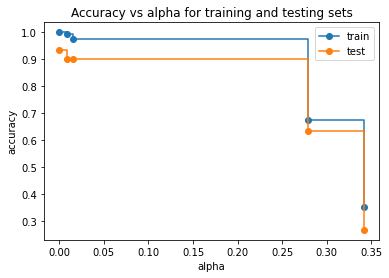

In [60]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [67]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.0)
clf.fit(x_train,y_train)


DecisionTreeClassifier(random_state=0)

In [68]:
pred=clf.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9333333333333333

[Text(334.8, 504.7714285714286, 'X[3] <= 0.8\ngini = 0.666\nsamples = 120\nvalue = [42, 39, 39]'),
 Text(167.4, 427.11428571428576, 'gini = 0.0\nsamples = 42\nvalue = [42, 0, 0]'),
 Text(502.20000000000005, 427.11428571428576, 'X[3] <= 1.75\ngini = 0.5\nsamples = 78\nvalue = [0, 39, 39]'),
 Text(334.8, 349.4571428571429, 'X[0] <= 4.95\ngini = 0.133\nsamples = 42\nvalue = [0, 39, 3]'),
 Text(167.4, 271.8, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(502.20000000000005, 271.8, 'X[2] <= 5.45\ngini = 0.093\nsamples = 41\nvalue = [0, 39, 2]'),
 Text(334.8, 194.14285714285717, 'X[2] <= 4.95\ngini = 0.049\nsamples = 40\nvalue = [0, 39, 1]'),
 Text(167.4, 116.48571428571432, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(502.20000000000005, 116.48571428571432, 'X[3] <= 1.55\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(334.8, 38.82857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(669.6, 38.82857142857142, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),


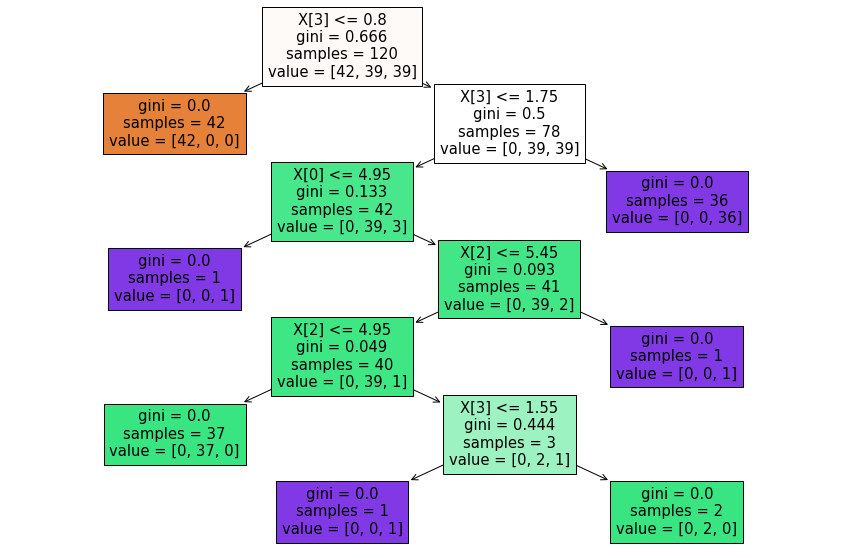

In [69]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)

In [37]:
df = sns.load_dataset('iris')

In [38]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [42]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [43]:
df['species'] = lb.fit_transform(df['species'])

In [44]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [46]:
x_ind = df.drop('species',axis=1)
x_ind

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [47]:
y_dep = df['species']

In [48]:
y_dep

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64